# 03. PyTroch Datasets & DataLoaders Tutorial

**Goals**: to understand the Dataset class, the DataLoader and batching

**Source**: [PyTorch Docs Datasets & DataLoaders](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html)

This notebook will provide examples and explanations of these objects.

## 1. Imports and basic configuration

In [1]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset # allows you to use pre-loaded datasets as your own
from torch.utils.data import DataLoader
from torchvision import datasets # consists of popular datasets
from torchvision.io import decode_image
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Basic checking
print(f"PyTroch vesrion: {torch.__version__}")
print(f"CUDA is available: {torch.cuda.is_available()}")

# Establish a seed value to ensure reproducibility
torch.manual_seed(42)

PyTroch vesrion: 2.9.0+cpu
CUDA is available: False


## 2. Loading a Dataset

In [2]:
# Loading training dataset
training_data = datasets.FashionMNIST(
    root='data', # the path where the train/test data is stored
    train=True,
    download=True,
    transform=ToTensor()
)

# Loading testing dataset
test_data = datasets.FashionMNIST(
    root='data', 
    train=False,
    download=True,
    transform=ToTensor()
)

## 3. Iterating and Visualizing the Dataset

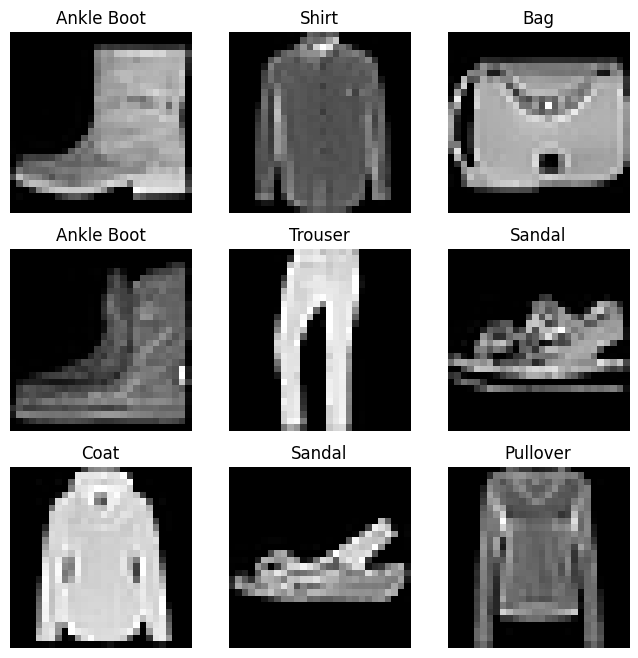

In [3]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## 4. Creating a Custom Dataset for your files

In [4]:
class CustomImageDataset(Dataset): # must implement three functions: __init__, __len__, and __getitem__.
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        '''
        We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).
        '''
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir # images are stored there
        self.transform = transform 
        self.target_transform = target_transform

    def __len__(self):
        '''
        Returns the number of samples in our dataset.
        '''
        return len(self.img_labels)

    def __getitem__(self, idx):
        '''
        Loads and returns a sample from the dataset at the given index idx.
        '''
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path) # converts to a tensor
        label = self.img_labels.iloc[idx, 1] # retrieves the corresponding label from the csv data
        # calls the transform functions on them (if applicable)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


## 5. Preparing your data for training with DataLoaders

We want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.

In [5]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## 6. Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


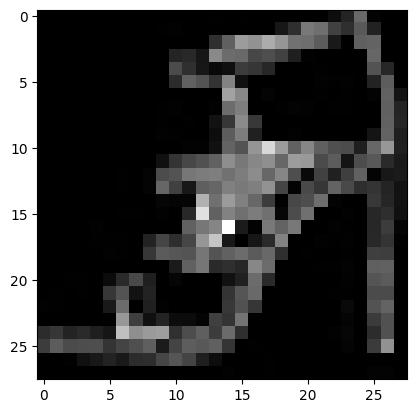

Label: Sandal


In [6]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {labels_map[label.item()]}")


## 7. Conclusion and notes

### We learned:
- `Dataset class` — is the one that deals with the data fetching (from the source) and the preprocessing part, and hence eventually gets the data ready in a form the neural network requires for training.
- `DataLoader` — is a utility provided by PyTorch that allows you to efficiently load and preprocess data in mini-batches, shuffle the data, and utilize multiprocessing to speed up data preparation.
- `Batching` — is refers to the process of grouping multiple data samples into fixed-size subsets, called batches, to enable efficient parallel processing during model training and inference.
### Notes:
- Reshuffle the data at every epoch to reduce model overfitting
- Use Python’s multiprocessing to speed up data retrieval